<a href="https://colab.research.google.com/github/ridhi26/NLP_TOOLKIT_GCN/blob/master/mostaccurategcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ridhi26/NLP_TOOLKIT_GCN

Cloning into 'NLP_TOOLKIT_GCN'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (234/234), done.
remote: Total 335 (delta 104), reused 290 (delta 86), pack-reused 0
Receiving objects: 100% (335/335), 5.81 MiB | 4.65 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [2]:
cd /content/NLP_TOOLKIT_GCN


/content/NLP_TOOLKIT_GCN


In [3]:
! pip install .

Processing /content/NLP_TOOLKIT_GCN
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.8MB 2.9MB/s 
     |████████████████████████████████| 1.4MB 30.4MB/s 
     |████████████████████████████████| 860kB 29.7MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 17.3MB 221kB/s 
     |████████████████████████████████| 1.5MB 40.7MB/s 
     |████████████████████████████████| 1.8MB 39.3MB/s 
     |████████████████████████████████| 1.0MB 20.3MB/s 
     |████████████████████████████████| 225kB 37.6MB/s 
     |████████████████████████████████| 10.1MB 41.0MB/s 
     |████████████████████████████████| 753.4MB 18kB/s 
     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 1.6MB 6.8MB/s 
     |████████████████████████████████| 655kB 26.5MB/s 
     |████████████████████████████████| 30.9MB 113kB/s 
   

In [1]:
 ! python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255078 sha256=c7b1566d661bd576a5227a38182ac5567e965074baf1c8a1bd47baf103b00d4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vgl514ee/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
from nlptoolkit.utils.config import Config

09/19/2020 09:22:51 AM [INFO]: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
09/19/2020 09:22:51 AM [INFO]: PyTorch version 1.4.0 available.
09/19/2020 09:22:56 AM [INFO]: TensorFlow version 2.3.0 available.
09/19/2020 09:22:56 AM [INFO]: PyTorch version 1.4.0 available.
09/19/2020 09:22:56 AM [INFO]: TensorFlow version 2.3.0 available.
09/19/2020 09:22:56 AM [INFO]: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
09/19/2020 09:22:56 AM [INFO]: TensorFlow version 2.3.0 available.
09/19/2020 09:22:56 AM [INFO]: PyTorch version 1.4.0 available.
09/19/2020 09:22:56 AM [INFO]: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
09/19/2020 09:22:56 AM [INFO]: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [3]:
from nlptoolkit.classification.models.GCN.trainer import train_and_fit
from nlptoolkit.classification.models.infer import infer_from_trained


In [4]:
config = Config(task='classification') # loads default argument parameters as above
config.train_data = '/content/NLP_TOOLKIT_GCN/data/train.csv' # sets training data path
config.infer_data = '/content/NLP_TOOLKIT_GCN/data/infer.csv' # sets infer data path

In [5]:
config.num_classes = 2 # sets number of prediction classes
config.batch_size = 4 # Changed batch size to 4
config.model_no = 0 # sets GCN model
config.lr = 0.001 # change learning rate
config.train_test_split = 1
config.infer=1
config.num_epochs=7000
config.batched =0

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

09/19/2020 09:24:08 AM [INFO]: Loading data...
09/19/2020 09:24:08 AM [INFO]: Building datasets and graph from raw data... Note this will take quite a while...
09/19/2020 09:24:08 AM [INFO]: Preparing data...
09/19/2020 09:24:16 AM [INFO]: Calculating Tf-idf...
09/19/2020 09:24:16 AM [INFO]: Building graph (No. of document, word nodes: 1152, 7000)...
09/19/2020 09:24:16 AM [INFO]: Adding document nodes to graph...
09/19/2020 09:24:16 AM [INFO]: Adding word nodes to graph...
09/19/2020 09:24:16 AM [INFO]: Building document-word edges...
100%|██████████| 1152/1152 [01:40<00:00, 11.50it/s]
09/19/2020 09:25:57 AM [INFO]: Calculating co-occurences...
100%|██████████| 1152/1152 [01:54<00:00,  7.92it/s]
09/19/2020 09:27:51 AM [INFO]: Calculating PMI*...
09/19/2020 09:27:51 AM [INFO]: NumExpr defaulting to 2 threads.
09/19/2020 09:28:31 AM [INFO]: Building word-word edges...
100%|██████████| 24496500/24496500 [04:19<00:00, 94564.52it/s] 
09/19/2020 09:33:47 AM [INFO]: Done and saved!
09/19/202

[Epoch 0]: Evaluation accuracy of trained nodes: 0.5043394
[Epoch 0]: Evaluation accuracy of test nodes: 0.5043478
[Epoch 0]: Loss: 0.6931235
Labels of trained nodes: 
 tensor([1, 1, 1,  ..., 1, 1, 1])
Ground Truth Labels of trained nodes: 
 tensor([0, 1, 0,  ..., 1, 0, 0])
[Epoch 50]: Evaluation accuracy of trained nodes: 0.5043394
[Epoch 50]: Evaluation accuracy of test nodes: 0.5043478
[Epoch 50]: Loss: 0.6930544
Labels of trained nodes: 
 tensor([1, 1, 1,  ..., 1, 1, 1])
Ground Truth Labels of trained nodes: 
 tensor([0, 1, 0,  ..., 1, 0, 0])
[Epoch 100]: Evaluation accuracy of trained nodes: 0.5699132
[Epoch 100]: Evaluation accuracy of test nodes: 0.5739130
[Epoch 100]: Loss: 0.6921327
Labels of trained nodes: 
 tensor([1, 1, 0,  ..., 1, 1, 1])
Ground Truth Labels of trained nodes: 
 tensor([0, 1, 0,  ..., 1, 0, 0])
[Epoch 150]: Evaluation accuracy of trained nodes: 0.5689489
[Epoch 150]: Evaluation accuracy of test nodes: 0.5826087
[Epoch 150]: Loss: 0.6877976
Labels of trained 

09/19/2020 05:00:47 PM [INFO]: Finished training!
09/19/2020 05:00:49 PM [INFO]: Evaluating on inference data...
09/19/2020 05:00:50 PM [INFO]: Done and saved!


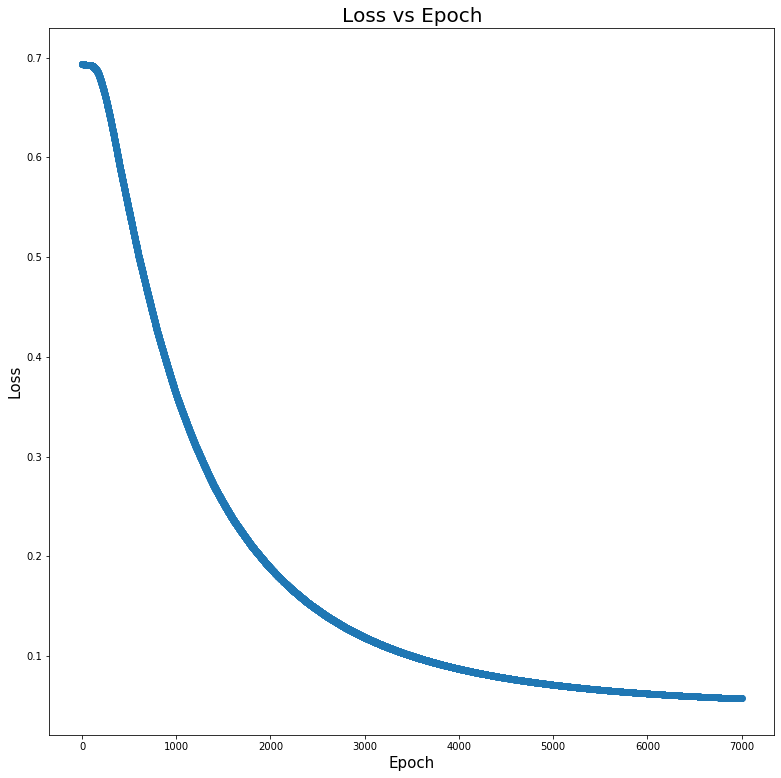

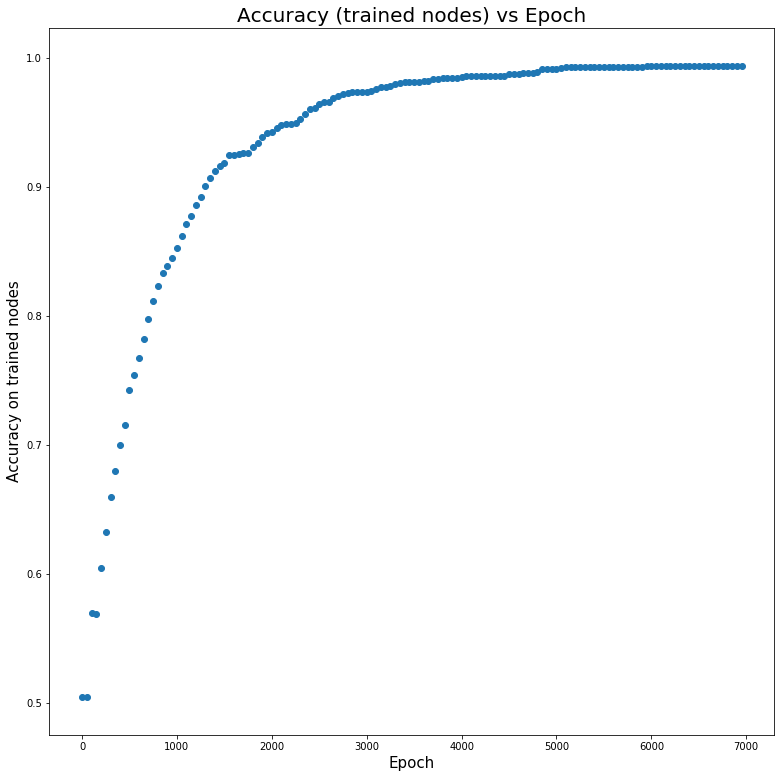

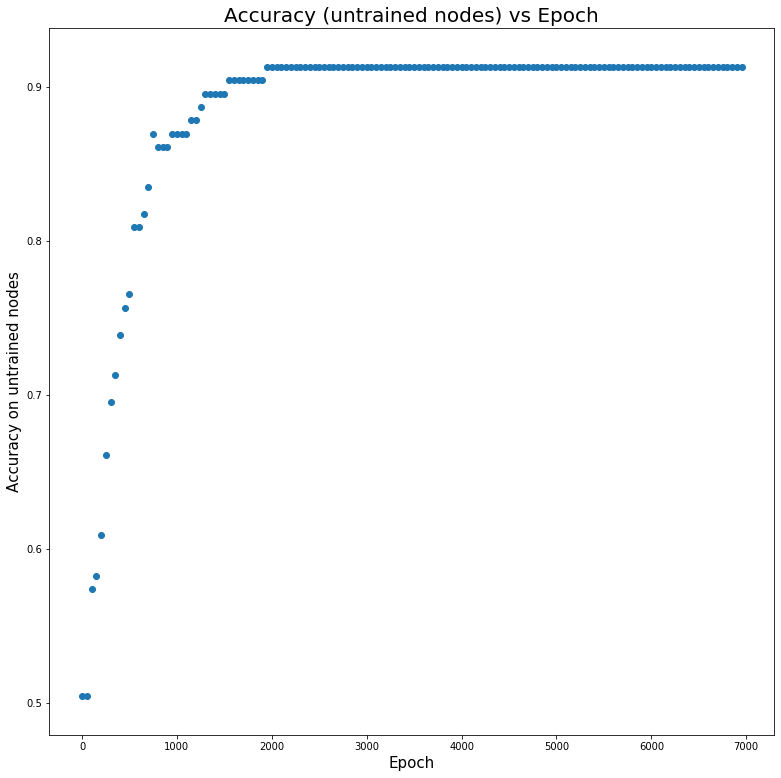

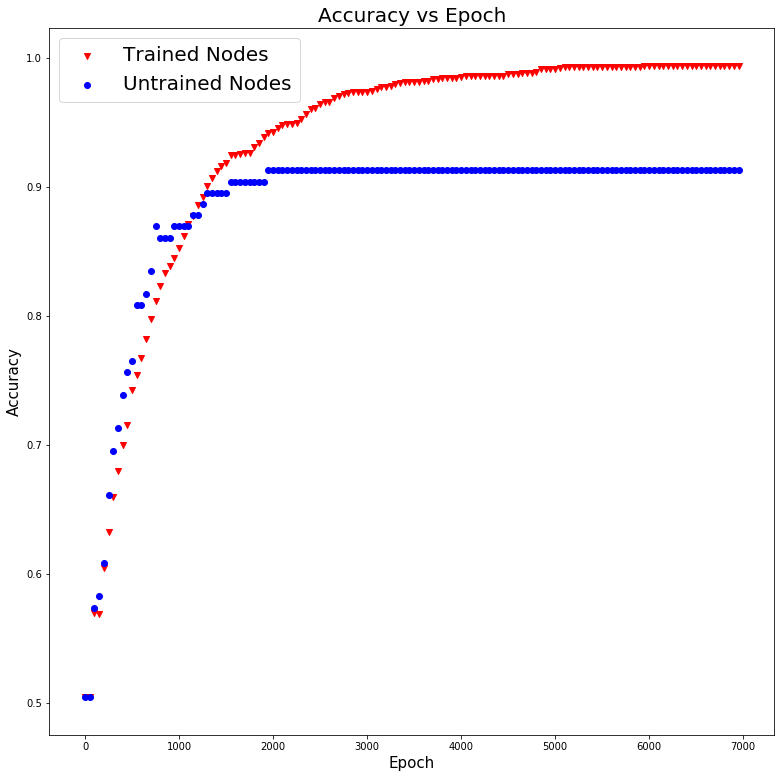

In [7]:
train_and_fit(config) # starts training with configured parameters
